# Project Nintendo Analyse 

### Achtergrond info:
Je wilt het succes van Nintendo analyseren. Je wilt in het algemeen zien hoe succesvol Nintendo consoles zijn en enkele succesvolle games voor deze consoles. Tenslotte wil je analyseren of de koopgedrag in games bij de consument mogelijk gebonden is aan de rating van dat type spel. Deze data willen wij nauwkeurig visualiseren en observeren. 


### Inhoud van dit project:

Ik ga in dit project een visuele weergave maken van de verkoopcijfers van de Nintendo consoles, verkoop/rating cijfers weergeven van de Nintendo gepubliceerde games. Ik begin eerste een analyse te maken van de datasets apart, voordat ik begin een analyse te maken over alle data in zijn geheel. 

Over de Console datasets ga ik de verkoopcijfers van Nintendo consoles bespreken opgevolgd door de verkoopcijfers van de best verkopende games dat uitgebracht werden door Nintendo van de Games sales met locatie info dataset. Ik ga daarna de Game rating dataset analyseren. Ik ga de data per console en per jaartal tussen 1996 tot 2023 filteren en vervolgens daarvan de games weergeven met de beste ratings.

Tenslotte ga ik een analyse maken van alle datasets bijelkaar. Ik ga per console proberen 3 spel titels te selecteren die in de game rating dataset voorkomen als de game sales dataset. De game sales dataset bevat niet alle data van consoles dat tot heden is uitgekomen, maar ik ga proberen van de selectie die ik tot mijn beschikking heb een analyse te maken.

In [1]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

import findspark
findspark.init()
import pyspark

from pyspark.sql import SparkSession 
from pyspark.sql.functions import col, when, lit
from pyspark.sql import functions as F

In [2]:
sc = SparkSession.builder.master("local[1]").appName("SparkByExamples.com").getOrCreate()

In [3]:
consoles_dataframe = sc.read.format('csv').option('header', 'true').option("delimiter", ",").load("../project/consolesDS1.csv")
games_dataframe = sc.read.format('csv').option('header', 'true').option("delimiter", ",").load("../project/videoGamesDS.csv")
nintendo_dataframe = sc.read.format('csv').option('header', 'true').option("delimiter", ",").load("../project/NintendoGames.csv") # https://www.kaggle.com/datasets/joebeachcapital/nintendo-games

## Consoles Dataset

### Verkoopcijfers van consoles 

Ik ga in dit gedeelte de verkoopcijfers te visualiseren van alle consoles. Het doel is om een visueel beeld te krijgen welke consoles de meest succesvolste waren allertijden.

In [4]:
consoles_dataframe.show()

+--------------------+--------+---------+-------------+--------------------+--------------------+--------------------+
|        Console Name|    Type|  Company|Released Year|Discontinuation Year|Units sold (million)|             Remarks|
+--------------------+--------+---------+-------------+--------------------+--------------------+--------------------+
|       PlayStation 2|    Home|     Sony|         2000|                2013|                 155|Final sales are g...|
|         Nintendo DS|Handheld| Nintendo|         2004|                2013|              154.02|                NULL|
|     Nintendo Switch|  Hybrid| Nintendo|         2017|                   0|              122.55|                NULL|
|            Game Boy|Handheld| Nintendo|         1989|                2003|               64.42|The Game Boy (198...|
|      Game Boy Color|Handheld| Nintendo|         1998|                2003|               44.06|                NULL|
|       PlayStation 4|    Home|     Sony|       

Ik heb in de dataframe gezien dat de kolom 'units sold (million)' niet gesorteerd werden weergegeven. Ik zorg dus dat de kolom wordt omgezet van een string waarde naar een double waarde zodat ik die aflopend kan weergeven in een plot later.

In [5]:
filtered_data = consoles_dataframe.withColumn('Units sold (million)', col('Units sold (million)').cast('double'))
sorted_console_df = filtered_data.orderBy('Units sold (million)', ascending=False)

In [6]:
rdd_consoles = sorted_console_df.rdd

Hieronder zien we de verkoopcijfers van alle consoles:

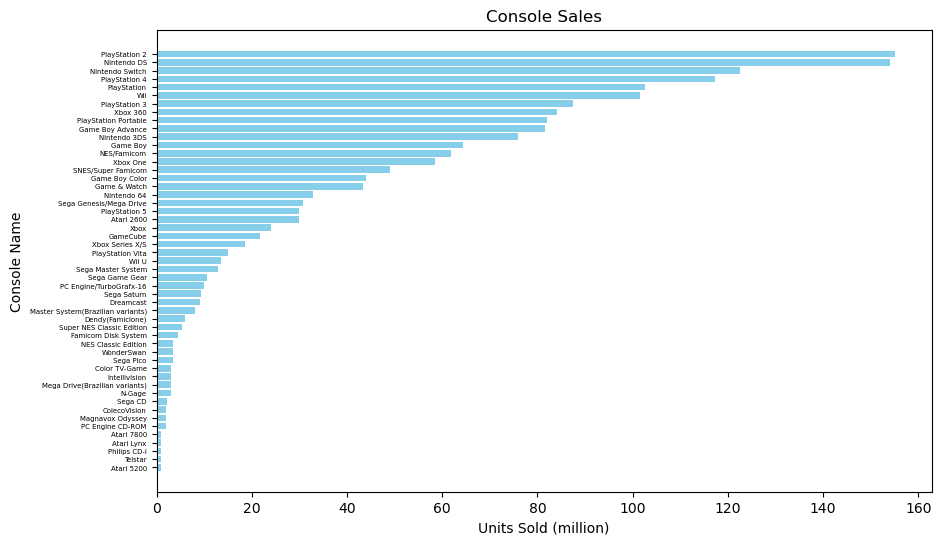

In [7]:
# Verzamel de gegevens van de RDD
console_data = rdd_consoles.collect()

# Extraheren van de console namen en verkoopcijfers
console_names = [row['Console Name'] for row in console_data]
units_sold = [float(row['Units sold (million)']) for row in console_data]

# Omgekeerde volgorde van de gegevens
console_names.reverse()
units_sold.reverse()


# Plot de gegevens
plt.figure(figsize=(10, 6))
plt.barh(console_names, units_sold, color='skyblue')

# Aanpassing van de lettergrootte van de y-as
plt.yticks(fontsize=5)  # Pas de gewenste lettergrootte aan

plt.xlabel('Units Sold (million)')
plt.ylabel('Console Name')
plt.title('Console Sales')
plt.show()

### Observatie:

We kunnen hieruit obeserveren dat Nintendo toch een grote speler is in de game industrie. Als wij de top 3 bekijken zien wij dat 2 van de 3 consoles die in deze top staan geproduceert werden door Nintendo zelf. Als we grafisch het verschil bekijken tussen de bestverkochter console (Playstation 2) en de 2e bestverkochte console (Nintendo DS), zien wij dat de Nintendo DS toch dichtbij kwam om de best verkochte console te zijn.

# Nintendo Games + manipulatie van alle datasets

We gaan hier de data voor de 3 datasets wat manipuleren zodat we alleen de nuttige data gebruiken om vervolgens deze datasets tot 1 project te combineren. We beginnen hier met de namen van de consolen gelijk te stellen in alle dataset zodat dit onze proces makkelijker zal maken. We zullen ook uiteindelijk de Nintendo games rating dataset en Nintendo game sales (met locatie) dataset wat dieper observeren.

### Nintendo game sales dataset met locatie data

We gaan hier alle consoles uit collecten en namen van de consoles hier aanpassen. We gaan ook een top 5 maken van de meest verkochte spellen wereldwijd.

In [8]:
games_dataframe.show(5)

+----+--------------------+--------+------+------------+---------+--------+--------+--------+-----------+------------+
|rank|                name|platform|  year|       genre|publisher|na_sales|eu_sales|jp_sales|other_sales|global_sales|
+----+--------------------+--------+------+------------+---------+--------+--------+--------+-----------+------------+
|   1|          Wii Sports|     Wii|2006.0|      Sports| Nintendo|   41.49|   29.02|    3.77|       8.46|       82.74|
|   2|   Super Mario Bros.|     NES|1985.0|    Platform| Nintendo|   29.08|    3.58|    6.81|       0.77|       40.24|
|   3|      Mario Kart Wii|     Wii|2008.0|      Racing| Nintendo|   15.85|   12.88|    3.79|       3.31|       35.82|
|   4|   Wii Sports Resort|     Wii|2009.0|      Sports| Nintendo|   15.75|   11.01|    3.28|       2.96|        33.0|
|   5|Pokemon Red/Pokem...|      GB|1996.0|Role-Playing| Nintendo|   11.27|    8.89|   10.22|        1.0|       31.37|
+----+--------------------+--------+------+-----

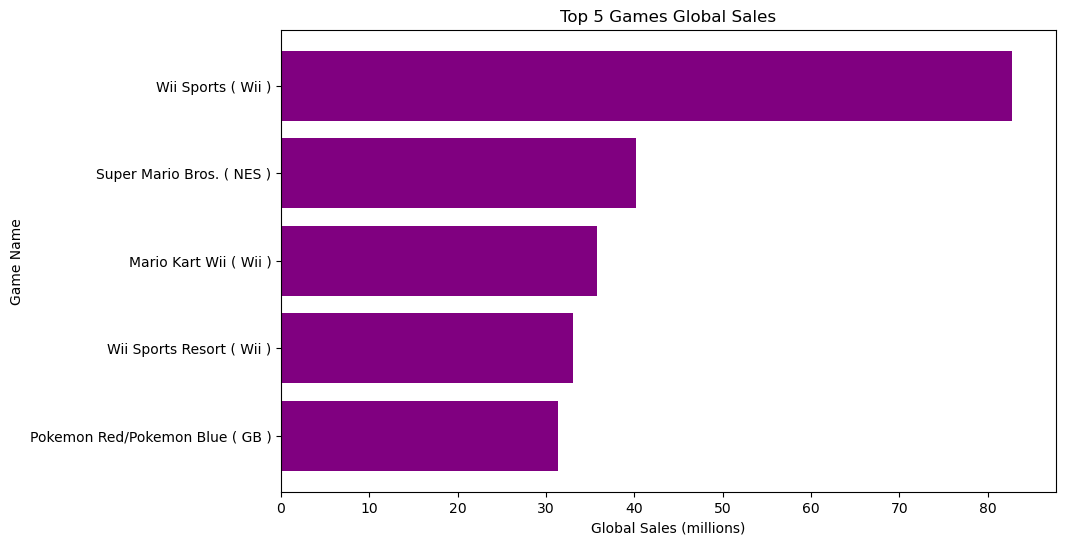

In [9]:
# Select relevant columns and concatenate title with platform, limit to top 5
game_names_with_platform = games_dataframe.select(
    F.concat_ws(' ', 'name', F.lit('('), 'platform', F.lit(')')).alias('game_with_platform'),
    'global_sales'
).limit(5).collect()

# Extract data for plotting
game_names = [row['game_with_platform'] for row in game_names_with_platform]
global_sales = [float(row['global_sales']) for row in game_names_with_platform]  # Convert to float

# Reverse the lists for better visualization
game_names.reverse()
global_sales.reverse()

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(game_names, global_sales, color='purple')
plt.yticks(fontsize=10)
plt.xlim(0, max(global_sales) + 5)  # Adjusted line for x-axis
plt.xlabel('Global Sales (millions)')
plt.ylabel('Game Name')
plt.title('Top 5 Games Global Sales')
plt.show()


### Observatie:

We kunnen hieruit obeserveren dat in deze top 5 ,de meest verkochte Nintendo games vooral voor de WII console waren. Wii Sports is in het algemeen de meeste verkochte Nintendo game tot op heden. Het is ook heel interessant te obeserveren dat Super Mario Bros de 2e meest verkochte spel is tot heden. Dit was voor de allereeste thuisconsole was dat Nintendo ontwikkeld had, de NES. Deze console van Nintendo is meer als 40 jaar oud en om te zien dat het toch nog zo hoog scoort is zeer interessant. 

Ik ga vervolgens deze wat manipuleren zodat dit later kan gebruikt worden in onze gecombineerde dataset observatie.

In [10]:
nintendo_games_data = games_dataframe.filter(
    (games_dataframe['publisher'] == 'Nintendo' ))
nintendo_games_data.select('Platform').distinct().show()

+--------+
|Platform|
+--------+
|     NES|
|     3DS|
|    WiiU|
|    SNES|
|      GB|
|     N64|
|     GBA|
|     Wii|
|      GC|
|      DS|
+--------+



In [11]:
modified_console_data_df = nintendo_games_data.withColumn(
    'Platform',
    when(col('Platform') == 'DS', 'Nintendo DS')
    .when(col('Platform') == '3DS', 'Nintendo 3DS')
    .when(col('Platform') == 'Switch', 'Nintendo Switch')
    .when(col('Platform') == 'WIIU', 'Wii U')
    .when(col('Platform') == 'WII', 'Wii')
    .when(col('Platform') ==  'GBA', 'Game Boy Advance')
    .when(col('Platform') ==  'GC' ,'GameCube')
    .when(col('Platform') == 'N64', 'Nintendo 64' )
    .when(col('Platform') == 'GB', 'Game Boy')
    .otherwise(col('Platform'))
)

# Show the modified console names
modified_console_data_df.select('Platform').distinct().show()

+----------------+
|        Platform|
+----------------+
|             NES|
|     Nintendo DS|
|        GameCube|
|Game Boy Advance|
|        Game Boy|
|            WiiU|
|            SNES|
|             Wii|
|    Nintendo 3DS|
|     Nintendo 64|
+----------------+



In [12]:
modified_console_data_df.show(3)

+----+-----------------+--------+------+--------+---------+--------+--------+--------+-----------+------------+
|rank|             name|Platform|  year|   genre|publisher|na_sales|eu_sales|jp_sales|other_sales|global_sales|
+----+-----------------+--------+------+--------+---------+--------+--------+--------+-----------+------------+
|   1|       Wii Sports|     Wii|2006.0|  Sports| Nintendo|   41.49|   29.02|    3.77|       8.46|       82.74|
|   2|Super Mario Bros.|     NES|1985.0|Platform| Nintendo|   29.08|    3.58|    6.81|       0.77|       40.24|
|   3|   Mario Kart Wii|     Wii|2008.0|  Racing| Nintendo|   15.85|   12.88|    3.79|       3.31|       35.82|
+----+-----------------+--------+------+--------+---------+--------+--------+--------+-----------+------------+
only showing top 3 rows



In [13]:
locasties_df = modified_console_data_df.select('name','platform','na_sales','eu_sales','jp_sales','other_sales','global_sales').collect()
game_data_met_locasties_df = sc.createDataFrame(locasties_df)
game_data_met_locasties_df.show(3)

+-----------------+--------+--------+--------+--------+-----------+------------+
|             name|platform|na_sales|eu_sales|jp_sales|other_sales|global_sales|
+-----------------+--------+--------+--------+--------+-----------+------------+
|       Wii Sports|     Wii|   41.49|   29.02|    3.77|       8.46|       82.74|
|Super Mario Bros.|     NES|   29.08|    3.58|    6.81|       0.77|       40.24|
|   Mario Kart Wii|     Wii|   15.85|   12.88|    3.79|       3.31|       35.82|
+-----------------+--------+--------+--------+--------+-----------+------------+
only showing top 3 rows



In [14]:
game_data_met_locasties_df.select('platform').distinct().show()

+----------------+
|        platform|
+----------------+
|             NES|
|     Nintendo DS|
|        GameCube|
|Game Boy Advance|
|        Game Boy|
|            WiiU|
|            SNES|
|             Wii|
|    Nintendo 3DS|
|     Nintendo 64|
+----------------+



### Console dataset

Ik ga hier de Nintendo consoles filteren. Ik ga hier geen observatie doen omdat ik dit later wou bespreken in dit project.

In [15]:
nintendo_consoles = [console for console in console_data if console['Company'] == 'Nintendo']
# lijst converteren naar nieuwe dataframe
console_data_df = sc.createDataFrame(nintendo_consoles)

# De console naam specifiek selecteren
console_names = console_data_df.select('Console Name')

# De console namen afdrukken van Nintendo
print("Console namen van de console dataset:")
console_names.show()


Console namen van de console dataset:
+--------------------+
|        Console Name|
+--------------------+
|         Nintendo DS|
|     Nintendo Switch|
|                 Wii|
|    Game Boy Advance|
|        Nintendo 3DS|
|            Game Boy|
|         NES/Famicom|
|  SNES/Super Famicom|
|      Game Boy Color|
|        Game & Watch|
|         Nintendo 64|
|            GameCube|
|               Wii U|
|Super NES Classic...|
| Famicom Disk System|
| NES Classic Edition|
|       Color TV-Game|
+--------------------+



In [16]:
console_data_df.show(3)

+---------------+--------+--------+-------------+--------------------+--------------------+-------+
|   Console Name|    Type| Company|Released Year|Discontinuation Year|Units sold (million)|Remarks|
+---------------+--------+--------+-------------+--------------------+--------------------+-------+
|    Nintendo DS|Handheld|Nintendo|         2004|                2013|              154.02|   NULL|
|Nintendo Switch|  Hybrid|Nintendo|         2017|                   0|              122.55|   NULL|
|            Wii|    Home|Nintendo|         2006|                2013|              101.63|   NULL|
+---------------+--------+--------+-------------+--------------------+--------------------+-------+
only showing top 3 rows



In [17]:
modified_console_data_df = console_data_df.select('Console Name','Units sold (million)').collect()
nintendo_consoles_df = sc.createDataFrame(modified_console_data_df)
nintendo_consoles_df.show(3)

+---------------+--------------------+
|   Console Name|Units sold (million)|
+---------------+--------------------+
|    Nintendo DS|              154.02|
|Nintendo Switch|              122.55|
|            Wii|              101.63|
+---------------+--------------------+
only showing top 3 rows



### Nintendo game rating dataset 

We beginnen hier consolenaam kolommen manipuleren zodat het later makkelijker is om deze dataset te gebruiken wanneer we al onze datasets samen gaan combineren. Ik ga ook een obeservatie doen over de top 5 games op basis van hun rating

In [18]:
nintendo_dataframe.show()
rdd_nintendo = nintendo_dataframe.rdd

+----------+--------------------+--------+------------+----------+--------------------+-----------+--------------------+--------------------+
|meta_score|               title|platform|        date|user_score|                link|esrb_rating|          developers|              genres|
+----------+--------------------+--------+------------+----------+--------------------+-----------+--------------------+--------------------+
|      NULL|     Super Mario RPG|  Switch|Nov 17, 2023|      NULL|/game/switch/supe...|          E|        ['Nintendo']|['Role-Playing', ...|
|      NULL| WarioWare: Move It!|  Switch| Nov 3, 2023|      NULL|/game/switch/wari...|         RP|['Intelligent Sys...|['Miscellaneous',...|
|      NULL|Super Mario Bros....|  Switch|Oct 20, 2023|      NULL|/game/switch/supe...|          E|        ['Nintendo']|['Action', 'Platf...|
|      NULL|Detective Pikachu...|  Switch| Oct 6, 2023|      NULL|/game/switch/dete...|       NULL|  ['Creatures Inc.']|['Adventure', '3D...|
|     

### Top Nintento Games per platform per jaar
We gaan in dit gedeelte de top beste rating games weergeven per jaar en per platform van nintendo consoles. 

In [19]:
nintendo_dataframe.show()
rdd_nintendo = nintendo_dataframe.rdd

+----------+--------------------+--------+------------+----------+--------------------+-----------+--------------------+--------------------+
|meta_score|               title|platform|        date|user_score|                link|esrb_rating|          developers|              genres|
+----------+--------------------+--------+------------+----------+--------------------+-----------+--------------------+--------------------+
|      NULL|     Super Mario RPG|  Switch|Nov 17, 2023|      NULL|/game/switch/supe...|          E|        ['Nintendo']|['Role-Playing', ...|
|      NULL| WarioWare: Move It!|  Switch| Nov 3, 2023|      NULL|/game/switch/wari...|         RP|['Intelligent Sys...|['Miscellaneous',...|
|      NULL|Super Mario Bros....|  Switch|Oct 20, 2023|      NULL|/game/switch/supe...|          E|        ['Nintendo']|['Action', 'Platf...|
|      NULL|Detective Pikachu...|  Switch| Oct 6, 2023|      NULL|/game/switch/dete...|       NULL|  ['Creatures Inc.']|['Adventure', '3D...|
|     

Hierin zitten heel wat spellen waar geen rating aan is gegeven voor meta score, dus dit filteren wij eruit om een beter overzicht te krijgen.

In [20]:
nintendo_dataframe_filtered = nintendo_dataframe.filter(col('meta_score').isNotNull())

We maken vervolgens een top 20 van beste nintento games rating. 

In [21]:
nintendo_dataframe_filtered
rdd_nintendo = nintendo_dataframe_filtered.rdd
rdd_nintendo.take(1)

[Row(meta_score='87', title='Pikmin 4', platform='Switch', date='Jul 21, 2023', user_score='9.0', link='/game/switch/pikmin-4', esrb_rating='E10+', developers="['Nintendo']", genres="['Strategy', 'Real-Time', 'General']")]

We manipuleren hier de kolom 'date' zodat hier alleen de jaartallen staan.

In [22]:
rdd_platforms = rdd_nintendo.map(lambda row: row['platform'])
rdd_dates = rdd_nintendo.map(lambda row: row['date'])

# Verzamel de resultaten als een lijst
platforms = rdd_platforms.collect()
dates = rdd_dates.collect()

# Eerste 10 
first_10_platforms = rdd_platforms.take(10)
first_10_dates = rdd_dates.take(10)

print(first_10_platforms)
print(first_10_dates)

['Switch', 'Switch', 'Switch', 'Switch', 'Switch', 'Switch', 'Switch', 'Switch', 'Switch', 'Switch']
['Jul 21, 2023', 'Jul 12, 2023', 'Jun 30, 2023', 'Jun 21, 2023', 'Jun 21, 2023', 'Jun 21, 2023', 'May 12, 2023', 'Apr 25, 2023', 'Apr 21, 2023', 'Mar 17, 2023']


De jaartallen worden gemanipuleerd zodat er later op label jaartal kan worden gezocht

In [23]:
# Eerst de RDD transformeren
years = rdd_nintendo.map(lambda row: row)

# Vervolgens de date-kolom splitsen en het jaartal extraheren
year = years.map(lambda row: row.date.split(', ')[-1])

# De eerste 5 jaarwaarden afdrukken
print(year.take(5))

['2023', '2023', '2023', '2023', '2023']


We willen dat alleen de unieke waarde wordt opgeslagen in de variabele.

In [24]:
# RDD transformeren om alleen het jaartal te behouden
distinct_platforms = rdd_platforms.distinct()
distinct_years = year.distinct()

# De jaartallen aflopend sorteren
sorted_years = distinct_years.filter(lambda year: year.isdigit()).sortBy(lambda year: int(year), ascending=False)

# De unieke jaartallen afdrukken
print(distinct_platforms.collect())
print(sorted_years.collect())

['Switch', 'iOS', '3DS', 'WIIU', 'DS', 'WII', 'GBA', 'GC', 'N64']
['2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996']


We maken hier labels aan zodat we uiteindelijk per console en per jaartal de data van de ratings van spellen kunnen aflezen

In [25]:
import ipywidgets as widgets
from IPython.display import display

# Unieke platformwaarden verzamelen als een lijst
distinct_platforms_list = distinct_platforms.collect()
sorted_years_list = sorted_years.collect()

# Create the Dropdown widget
console = widgets.Dropdown(
    options=distinct_platforms_list,
    value= distinct_platforms_list[0],
    description='Platform: ',
    disabled=False,
)

# Display the widget
display(console)

years = widgets.Dropdown(
    options= sorted_years_list,
    value= sorted_years_list[0],
    description='Year: ',
    disabled=False,
)
display(years)

Dropdown(description='Platform: ', options=('Switch', 'iOS', '3DS', 'WIIU', 'DS', 'WII', 'GBA', 'GC', 'N64'), …

Dropdown(description='Year: ', options=('2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015'…

In [26]:
# get widget values
PLATFORM = console.value
YEAR = years.value
print(PLATFORM,YEAR)

Switch 2023


In [27]:
from pyspark.sql.functions import split, col

# Split the date column into components
nintendo_dataframe_filtered = nintendo_dataframe_filtered.withColumn("date_components", split(nintendo_dataframe_filtered["date"], ", "))
# Extract the year from the resulting array
nintendo_dataframe_filtered = nintendo_dataframe_filtered.withColumn("year", nintendo_dataframe_filtered["date_components"].getItem(1))
# Filter based on the desired year and platform
filtered_data = nintendo_dataframe_filtered.filter(
    (nintendo_dataframe_filtered['year'] == YEAR) & 
    (nintendo_dataframe_filtered['platform'] == PLATFORM)
)
# Drop the intermediate columns
filtered_data = filtered_data.drop("date_components", "year")

# Sorteer de gegevens op basis van 'meta_score'
sorted_data = filtered_data.orderBy('meta_score', ascending=False)

# Toon de top 20 games
sorted_data.show()


+----------+--------------------+--------+------------+----------+--------------------+-----------+--------------------+--------------------+
|meta_score|               title|platform|        date|user_score|                link|esrb_rating|          developers|              genres|
+----------+--------------------+--------+------------+----------+--------------------+-----------+--------------------+--------------------+
|        96|The Legend of Zel...|  Switch|May 12, 2023|       8.2|/game/switch/the-...|       E10+|        ['Nintendo']|['Action Adventur...|
|        94|Metroid Prime Rem...|  Switch| Feb 8, 2023|       8.7|/game/switch/metr...|          T|['Nintendo', ' Re...|['Action', 'Shoot...|
|        92|Xenoblade Chronic...|  Switch|Apr 25, 2023|       8.8|/game/switch/xeno...|          T|   ['Monolith Soft']|['Role-Playing', ...|
|        87|            Pikmin 4|  Switch|Jul 21, 2023|       9.0|/game/switch/pikm...|       E10+|        ['Nintendo']|['Strategy', 'Rea...|
|     

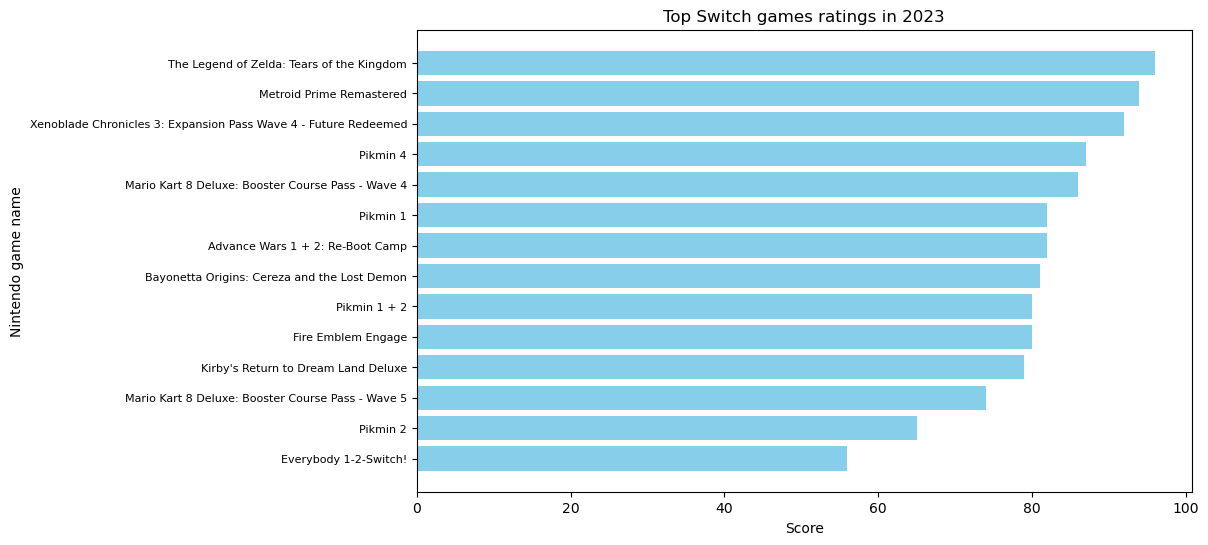

In [28]:
# Verzamel de gegevens van de RDD
videoGames_data = sorted_data.collect()

# Extraheren van de game namen en scores
videoGames_namen = [row['title'] for row in videoGames_data]
units_sold = [float(row['meta_score']) for row in videoGames_data]

# Omgekeerde volgorde van de gegevens
videoGames_namen.reverse()
units_sold.reverse()

# Plot de gegevens
plt.figure(figsize=(10, 6))
plt.barh(videoGames_namen, units_sold, color='skyblue')

# Aanpassing van de lettergrootte van de y-as
plt.yticks(fontsize=8)  # Pas de gewenste lettergrootte aan

plt.xlabel('Score')
plt.ylabel('Nintendo game name')
plt.title(f'Top {PLATFORM} games ratings in {YEAR}')

plt.show()

Ik ga vervolgens deze dataset wat manipuleren zodat dit later kan gebruikt worden in onze gecombineerde dataset observatie.

In [29]:
modified_nintendo_df = nintendo_dataframe_filtered.select('meta_score','title','platform').collect()
nintendo_ratings_df = sc.createDataFrame(modified_nintendo_df)
nintendo_ratings_df.show(3)

+----------+--------------------+--------+
|meta_score|               title|platform|
+----------+--------------------+--------+
|        87|            Pikmin 4|  Switch|
|        74|Mario Kart 8 Delu...|  Switch|
|        56|Everybody 1-2-Swi...|  Switch|
+----------+--------------------+--------+
only showing top 3 rows



In [30]:
nintendo_ratings_df.select('platform').distinct().show()

+--------+
|platform|
+--------+
|  Switch|
|     iOS|
|     3DS|
|     WII|
|    WIIU|
|     N64|
|     GBA|
|      GC|
|      DS|
+--------+



In [31]:
modified_nintendo_ratings_df = nintendo_ratings_df.withColumn(
    'Platform',
    when(col('Platform') == 'DS', 'Nintendo DS')
    .when(col('Platform') == '3DS', 'Nintendo 3DS')
    .when(col('Platform') == 'Switch', 'Nintendo Switch')
    .when(col('Platform') == 'WIIU', 'Wii U')
    .when(col('Platform') == 'WII', 'Wii')
    .when(col('Platform') ==  'GBA', 'Game Boy Advance')
    .when(col('Platform') ==  'GC' ,'GameCube')
    .when(col('Platform') == 'N64', 'Nintendo 64' )
    .otherwise(col('Platform'))
)

# Show the modified console names
modified_nintendo_ratings_df.select('Platform').distinct().show()

+----------------+
|        Platform|
+----------------+
|     Nintendo DS|
|        GameCube|
|Game Boy Advance|
|             iOS|
|           Wii U|
| Nintendo Switch|
|             Wii|
|    Nintendo 3DS|
|     Nintendo 64|
+----------------+



# Datasets combineren

In dit deel ga ik de datasets vergelijken op console naam en nodige filters en manipulaties toepassen dat de de console dataset, game rating en game sales + locaties dataset met elkaar overeen komen. Ik zorg aan de hand van widgets dat er een console kan geselecteerd worden waar vervolgens voor die type console een top games wordt weergeven die vervolgens in diagrammen de verkoopcijfers voor die games en ratings weergeeft voor die games. In de laatste fase geef ik de verkoopcijfers op een wereldkaart weer voor Noord-Amerika, Europa en Japan.

Het doel is om een vergelijking te maken tussen verkoopcijfers en ratings van de games.

Ik vergelijk hieronder alle type consoles in de datasets:

In [32]:
modified_nintendo_ratings_values = [row['Platform'] for row in modified_nintendo_ratings_df.collect()]
filtered_game_data_met_locasties_df = game_data_met_locasties_df.filter(col('platform').isin(modified_nintendo_ratings_values))

print("Console dataset:")
console_data_df.select('Console Name').distinct().show()
print("Nintendo dataset met locatie data's:")
filtered_game_data_met_locasties_df.select('platform').distinct().show()
print("Nintendo dataset met game ratings:")
modified_nintendo_ratings_df.select('platform').distinct().show()

Console dataset:
+--------------------+
|        Console Name|
+--------------------+
|         NES/Famicom|
|         Nintendo DS|
|            GameCube|
|    Game Boy Advance|
|      Game Boy Color|
|            Game Boy|
|Super NES Classic...|
|               Wii U|
|  SNES/Super Famicom|
| NES Classic Edition|
| Famicom Disk System|
|       Color TV-Game|
|        Game & Watch|
|     Nintendo Switch|
|                 Wii|
|        Nintendo 3DS|
|         Nintendo 64|
+--------------------+

Nintendo dataset met locatie data's:
+----------------+
|        platform|
+----------------+
|     Nintendo DS|
|        GameCube|
|Game Boy Advance|
|             Wii|
|    Nintendo 3DS|
|     Nintendo 64|
+----------------+

Nintendo dataset met game ratings:
+----------------+
|        platform|
+----------------+
|     Nintendo DS|
|        GameCube|
|Game Boy Advance|
|             iOS|
|           Wii U|
| Nintendo Switch|
|             Wii|
|    Nintendo 3DS|
|     Nintendo 64|
+-------

Hierboven zien wij overzichtelijk welke consoles er gebruikt worden in de datasets. Ik heb besloten om mijn project te baseren op de dataset van de game dataset met verkoopcijfers (+locatie). Ik koos om met deze dataset te werken omdat al die consoles in elk ander dataset ook voorkomt en makkelijk is om mee te werken dan. Ik heb geprobeerd om nog andere datasets te vinden van consoles die ontbraken van Nintendo maar tevergeefs vond ik niet echt geschikte datasets.

In [33]:
lijst = filtered_game_data_met_locasties_df.select('Platform').distinct()
lijst.show()

+----------------+
|        Platform|
+----------------+
|     Nintendo DS|
|        GameCube|
|Game Boy Advance|
|             Wii|
|    Nintendo 3DS|
|     Nintendo 64|
+----------------+



In dit stuk maak ik een widget om de consoles te selecteren uit de dataset van de nintendo games met sales en locatie data:

In [34]:
namen_locatie_ds = filtered_game_data_met_locasties_df.select('Platform').distinct()
namen_locatie_ds_rdd = namen_locatie_ds.rdd.map(lambda row: row['Platform'])
lijst = namen_locatie_ds_rdd.collect()

# Create the Dropdown widget
console = widgets.Dropdown(
    options=lijst,
    value= lijst[0],
    description='Platform: ',
    disabled=False,
)
# Display the widget
display(console)



Dropdown(description='Platform: ', options=('Nintendo DS', 'GameCube', 'Game Boy Advance', 'Wii', 'Nintendo 3D…

In [97]:
# get widget values
PLATFORM = console.value
print(PLATFORM)

Wii


In de codeblokken hieronder zorg ik dat alle datasets die betrokken zijn de data weergeven van de geselecteerde console van de widget:

In [98]:
filtered_data = modified_nintendo_ratings_df.filter(
    (modified_nintendo_ratings_df['platform'] == PLATFORM 
))

gesorteerde_game_data = filtered_data.orderBy('meta_score', ascending=False)

In [99]:
#Game data met ratings
filtered_data = modified_nintendo_ratings_df.filter(
    (modified_nintendo_ratings_df['platform'] == PLATFORM 
))
gesorteerde_game_data = filtered_data.orderBy('meta_score', ascending=False)
game_data = gesorteerde_game_data.filter(gesorteerde_game_data['platform'] == PLATFORM).select('title','meta_score').collect()
game_data = sc.createDataFrame(game_data)

#Console data
console_data_df
geselecteerd_console = console_data_df.select('Console Name', 'Units sold (million)').collect()
geselecteerd_console_df = sc.createDataFrame(geselecteerd_console)

#game data met locaties
filtered_game_data_met_locasties_df
geselecteerde_console_bijhorende_data = filtered_game_data_met_locasties_df.filter(filtered_game_data_met_locasties_df['Platform'] == PLATFORM).collect()
geselecteerde_console_bijhorende_data_df = sc.createDataFrame(geselecteerde_console_bijhorende_data)
geselecteerde_console_bijhorende_data_rdd = geselecteerde_console_bijhorende_data_df.rdd
geselecteerde_console_bijhorende_data = geselecteerde_console_bijhorende_data_rdd.collect()

rdd_game_data = game_data.rdd
filtered_top_r_rdd = rdd_game_data.filter(lambda row: row['title'] in [item['name'] for item in geselecteerde_console_bijhorende_data])
filtered_top_r_df = sc.createDataFrame(filtered_top_r_rdd)
filtered_top_r = filtered_top_r_df.collect()

In deze blok code vergelijk ik de game dataset met de ratings met de game dataset met de sales + locatie data. Ik zorg dus dat beide datasets dezelfde games weergeven en controleer dit ook door de datasets te visualiseren.

In [100]:
# controle filter of games in beide datasets aanwezig zitten:
top3_l_df = sc.createDataFrame(geselecteerde_console_bijhorende_data)
rdd_top3_l = top3_l_df.rdd

filtered_top_l_rdd = rdd_top3_l.filter(lambda row: row['name'] in [item['title'] for item in filtered_top_r])

# Er wordt geprobeert uit de dataset 3 games te halen
top_games_l = filtered_top_l_rdd.take(3)
filtered_top_l_df = sc.createDataFrame(top_games_l)

In [101]:
# De geselecteerde games van de dataset met de locatie data wordt ook gezocht in de dataset met de game ratings
df_game_data = sc.createDataFrame(filtered_top_r)
filtered_top3_r_df = sc.createDataFrame(filtered_top_r).filter(col('title').isin([item['name'] for item in top_games_l]))

# We geven onze data weer:
print("Consoles dataset:")
geselecteerd_console_df.show()
print("Game rating dataset:")
filtered_top3_r_df.show()
print("Game sales + locatie dataset:")
filtered_top_l_df.show()

Consoles dataset:
+--------------------+--------------------+
|        Console Name|Units sold (million)|
+--------------------+--------------------+
|         Nintendo DS|              154.02|
|     Nintendo Switch|              122.55|
|                 Wii|              101.63|
|    Game Boy Advance|               81.51|
|        Nintendo 3DS|               75.94|
|            Game Boy|               64.42|
|         NES/Famicom|               61.91|
|  SNES/Super Famicom|                49.1|
|      Game Boy Color|               44.06|
|        Game & Watch|                43.4|
|         Nintendo 64|               32.93|
|            GameCube|               21.74|
|               Wii U|               13.56|
|Super NES Classic...|                5.28|
| Famicom Disk System|                 4.5|
| NES Classic Edition|                3.56|
|       Color TV-Game|                 3.0|
+--------------------+--------------------+

Game rating dataset:
+-----------------+----------+
|    

In deze blok code tel ik hoeveel game items er zijn. Dit heeft als bedoeling om in mijn plot de daadwerkelijke aantal items af te drukken die ik visualiseer.

In [102]:
aantal_games = 0
filtered_top3_r_rdd = filtered_top3_r_df.rdd.collect()
for aantal in filtered_top3_r_rdd:
    aantal_games += 1

Vanaf hier doe ik de nodige voorbereidende werk om tenslotte mijn data te visualiseren. 

In [103]:
#converteer naar RDD
rdd_top3_locatie = filtered_top_l_df.rdd

# Verzamel de gegevens van de RDD
console_data = geselecteerd_console_df.collect()
game_data = filtered_top3_r_rdd
game_data_locatie = rdd_top3_locatie.collect()

# Extraheren van de console namen en verkoopcijfers
console_names = [row['Console Name'] for row in console_data]
units_sold = [float(row['Units sold (million)']) for row in console_data]

# Extraheren van de game namen en rating
game_namen = [row['title'] for row in game_data]
units_rating = [float(row['meta_score']) for row in game_data]

# Extraheren van de game namen en sales
game_namen_salesDS = [row['name'] for row in game_data_locatie]
game_sales = [float(row['global_sales']) for row in game_data_locatie]

Hier wordt de consoles dataset gevisualiseerd en kunnen wij een vergelijking maken hoe goed een de geselecteerde Nintendo console het heeft gedaan vergeleken met de andere Nintendo consoles.

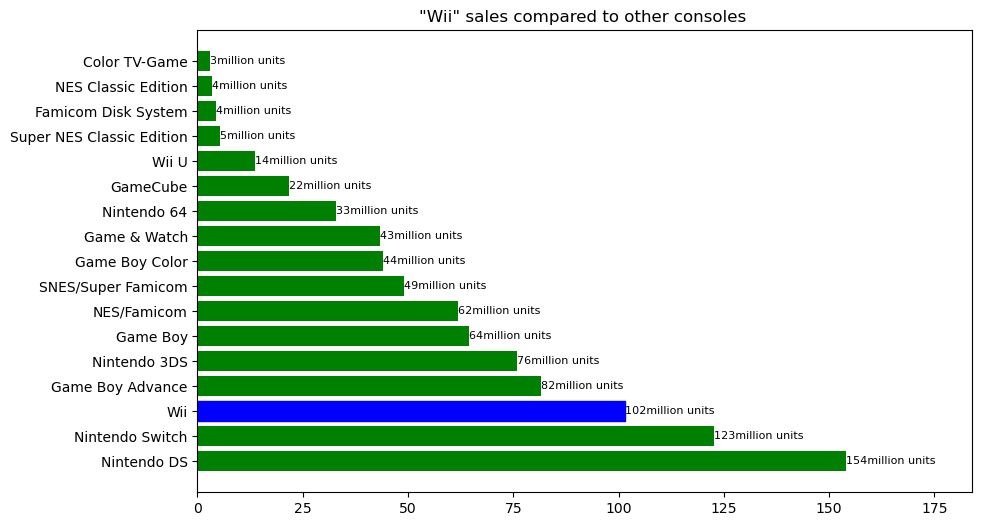

The Wii is the nr.3 best sold Nintendo console.


In [104]:
# Plot de gegevens
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.barh(console_names, units_sold, color='green')

# Find the index of the selected console in the list of console names
selected_console_index = console_names.index(PLATFORM)

# Change the color of the bar corresponding to the selected console to blue
bars1[selected_console_index].set_color('blue')

# Aanpassing van de lettergrootte van de y-as
plt.yticks(fontsize=10)
plt.title(f'"{PLATFORM}" sales compared to other consoles ')

max_width = 0

for bar in bars1:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.0f}million units', va='center', fontsize=8)
    max_width = max(max_width, width)

plt.xlim(0, max_width + 30)
plt.show()

print(f"The {PLATFORM} is the nr.{selected_console_index+1} best sold Nintendo console.")


Hier worden de games gevisualiseert op data van wereldwijd verkoopcijfers en op data van de ratings:

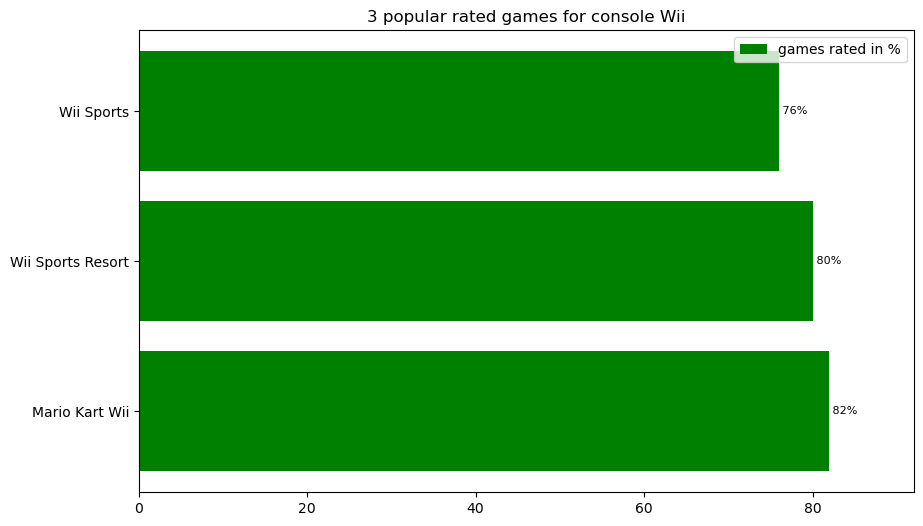

In [119]:
# Plot de gegevens
fig, ax = plt.subplots(figsize=(10, 6))  # Aangepaste breedte van de figuur
bars2 = ax.barh(game_namen, units_rating, color='green', label=f'games rated in %')

# Aanpassing van de lettergrootte van de y-as
plt.yticks(fontsize=10)  # Pas de gewenste lettergrootte aan
plt.xlabel('')
plt.title(f'{aantal_games} popular rated games for console {PLATFORM}')

# Legenda toevoegen
plt.legend()

# Voeg de tekst toe op de barplots
max_width = 0  # Initieer maximale breedte

# Voeg de tekst toe op de barplots
for bar in bars2:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width: .0f}%', va='center', fontsize=8)  # Aangepaste lettergrootte
    
    # Update de maximale breedte indien nodig
    max_width = max(max_width, width)

# Pas de x-as limieten aan
plt.xlim(0, max_width + 10)  # Aangepaste limieten

plt.show()

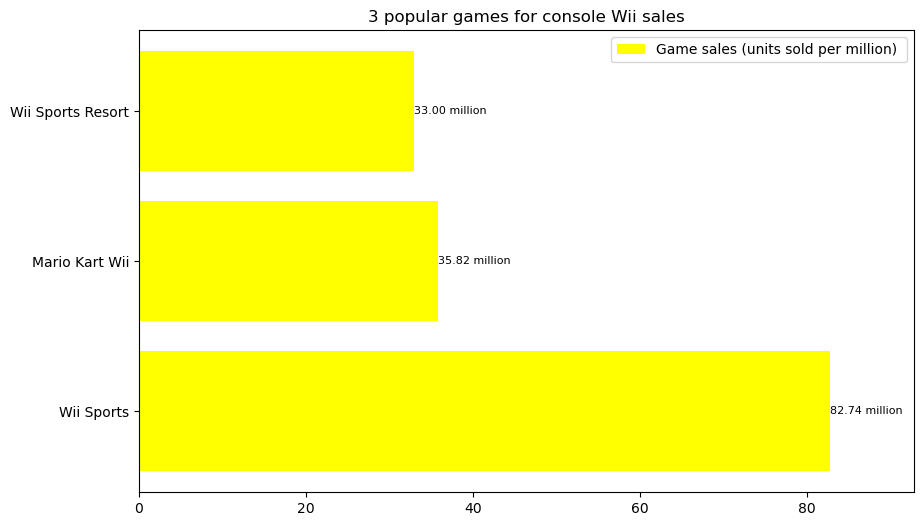

In [120]:
# Plot de gegevens
fig, ax = plt.subplots(figsize=(10, 6))  # Aangepaste breedte van de figuur
bars3 = ax.barh(game_namen_salesDS, game_sales, color='yellow', label='Game sales (units sold per million) ')

# Aanpassing van de lettergrootte van de y-as
plt.yticks(fontsize=10)  # Pas de gewenste lettergrootte aan

plt.xlabel('')
plt.title(f'{aantal_games} popular games for console {PLATFORM} sales')

# Legenda toevoegen
plt.legend()

# Voeg de tekst toe op de barplots
max_width = 0  # Initieer maximale breedte

for bar in bars3:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f} million', va='center', fontsize=8)  # Aangepaste lettergrootte 
    
    # Update de maximale breedte indien nodig
    max_width = max(max_width, width)

# Pas de x-as limieten aan
plt.xlim(0, max_width + 10)  # Aangepaste limieten

plt.show()

### Observatie:

Het is interessant om te zien dat bij sommige consoles de rating van games gegeven door de mensen lager ligt als de uiteindelijk verkoopcijfers. Een mogelijke factor kan zijn is dat een spel voornamelijk uit bekendheid werd gekocht omdat het mogelijk een 'hype' was, dan dat het spel mogelijk echt goed of de moeite was om aan te schaffen.



## Visualisatie op een wereldkaart

Het doel van deze visualisatie is om het aantal verkoopcijfers via een wereldkaart visueel weer te geven. Je kunt aan de hand van de kleuren en de legende aflijden in hoeveel miljoenen units de games zijn verkocht tussen Noord-Amerika, Japan en Europa. Ik heb de landen voor Europa en Noord-Amerika zelf moeten genereren door alle landen zelf op te zoeken die tot het grondgebied van Europa en Noord-Amerika behoren. 

Aan de hand van een widget kun je de data bekijken van de games die gelinkt zijn met de console die geselecteert staat bij bovenstaande widget.

In [107]:
import folium
import requests

In [108]:
filtered_top_l_df.show()

+-----------------+--------+--------+--------+--------+-----------+------------+
|             name|platform|na_sales|eu_sales|jp_sales|other_sales|global_sales|
+-----------------+--------+--------+--------+--------+-----------+------------+
|       Wii Sports|     Wii|   41.49|   29.02|    3.77|       8.46|       82.74|
|   Mario Kart Wii|     Wii|   15.85|   12.88|    3.79|       3.31|       35.82|
|Wii Sports Resort|     Wii|   15.75|   11.01|    3.28|       2.96|        33.0|
+-----------------+--------+--------+--------+--------+-----------+------------+



Ik selecteer in deze blok de nodige kolommen die ik nodig heb voor mijn visualisatie:

In [109]:
# Haal specifieke data uit de dataframe
games = filtered_top_l_df.select('name').rdd.flatMap(lambda x: x).collect()
na_sales = filtered_top_l_df.select('na_sales').rdd.flatMap(lambda x: x).collect()
jp_sales = filtered_top_l_df.select('jp_sales').rdd.flatMap(lambda x: x).collect()
eu_sales = filtered_top_l_df.select('eu_sales').rdd.flatMap(lambda x: x).collect()
global_sales = filtered_top_l_df.select('global_sales').rdd.flatMap(lambda x: x).collect()

Ik zorg hier voor een widget van uit de selectie van games die werd weergegeven in de plot hierboven. 

In [110]:
# Create the Dropdown widget
game_selectie = widgets.Dropdown(
    options=games,
    value= games[0],
    description='Games: ',
    disabled=False,
)
# Display the widget
display(game_selectie)

Dropdown(description='Games: ', options=('Wii Sports', 'Mario Kart Wii', 'Wii Sports Resort'), value='Wii Spor…

In [111]:
selected_game = game_selectie.value
selected_game_index = games.index(selected_game)
selected_game_global_sales = global_sales[selected_game_index]

# Zoek de rij in de dataframe die overeenkomt met het geselecteerde spel
selected_game_row = filtered_top_l_df.filter(filtered_top_l_df.name == selected_game).first()

De codeblok hieronder is een voorbereinde blok code om mijn landen te selecteren die betrokken zijn met dit project.

In [112]:
m = folium.Map((1, 1), zoom_start=2.4, tiles="cartodbpositron")

geojson_data = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/world_countries.json"
).json()

# Zoek de feature met de naam "Japan" en verkrijg de bijbehorende geometrie
japan = "Japan"
europe_names = ["Belgium", "Bulgaria", "Cyprus", "Denmark", "Germany", "Estonia", "Finland", "France", "Greece", "Hungary", "Ireland", "Italy", "Croatia", "Latvia", "Lithuania", "Luxembourg", 
                "Malta", "Netherlands", "Austria", "Poland", "Portugal", "Romania", "Slovenia", "Slovakia", "Spain", "Czech Republic", "Sweden", "Albania", "Andorra", "Armenia", "Azerbaijan", 
                "Bosnia and Herzegovina", "Georgia", "Iceland", "Liechtenstein", "Moldova", "Monaco", "Montenegro", "Macedonia", "Norway", "Ukraine", "San Marino", "Republic of Serbia", "Turkey", 
                "United Kingdom", "Switzerland","Belarus", "Kosovo", "Vatican City"]

north_america = ["Canada", "United States", "Mexico", "Greenland", "Guatemala", "Belize", "El Salvador", "Honduras", "Nicaragua", "Costa Rica", "Panama", "Cuba", "Jamaica", "Haiti", "Dominican Republic",
                 "Puerto Rico", "Bahamas", "Turks and Caicos Islands", "British Virgin Islands", "U.S. Virgin Islands", "Anguilla", "Antigua and Barbuda", "Saint Kitts and Nevis", "Montserrat", 
                 "Guadeloupe", "Dominica", "Martinique", "Saint Lucia", "Saint Vincent and the Grenadines", "Barbados", "Grenada", "Trinidad and Tobago", "Aruba", "Curaçao", "Bonaire", 
                 "Saint Barthelemy", "Saint Martin", "Sint Maarten", "Saba", "Sint Eustatius", "Cayman Islands", "Bermuda", "Saint Pierre and Miquelon", "Mexico", "Greenland","United States of America"]

Ik heb hieronder een functie gemaakt die voor de bepaalde verkoopcijfers een bepaalde kleur teruggeeft. Die type kleur zou dan uiteindelijk gebruikt worden om de betrokken landen in die specifieke kleur weer te geven van hoeveel units ze hebben verkocht.

In [113]:
def get_color(value):
    # Convert the value to float (or int) before comparison
    value = float(value)
    if value > 60:
        return 'purple'
    elif value > 40:
        return 'darkred'
    elif value > 20:
        return 'red'
    elif value > 10:
        return 'orange'
    elif value > 5:
        return 'yellow'
    else:
        return 'green'

Hieronder zorg ik voor de visualisatie op de wereldkaart van de verkoopcijfers van de games in Noord-Amerika , Europa en Japan. Ik heb hier alleen als enigste issue gehad dat French Guarma onderdeel uitmaakt uit de data van Frankrijk, dus ik kon helaas deze niet wegsplitsen.

In [115]:
# Haal de verkoopcijfers op
na_sales_selected = selected_game_row['na_sales']
jp_sales_selected = selected_game_row['jp_sales']
eu_sales_selected = selected_game_row['eu_sales']

# Pas de kleuren aan op basis van de verkoopcijfers
na_color = get_color(na_sales_selected)
jp_color = get_color(jp_sales_selected)
eu_color = get_color(eu_sales_selected)

# Maak de kaart opnieuw en kleur de landen in
m = folium.Map(location=[60, -10], zoom_start=2,tiles="cartodb positron")

for feature in geojson_data["features"]:
    country_name = feature["properties"]["name"]
    
    if country_name == japan:
        japan_geometry = feature["geometry"]
        folium.GeoJson(japan_geometry, name=country_name, style_function=lambda x: {'fillColor': jp_color, 'color': jp_color, 'weight': 1}).add_to(m)

    elif country_name in europe_names:
        folium.GeoJson(feature["geometry"], name=country_name, style_function=lambda x: {'fillColor': eu_color, 'color': eu_color, 'weight': 1}).add_to(m)
        
    elif country_name in north_america:
        folium.GeoJson(feature["geometry"], name=country_name, style_function=lambda x: {'fillColor': na_color, 'color': na_color, 'weight': 1}).add_to(m)

# Add legend
legend_html = f"""
<div style="position: fixed; bottom: 50px; left: 50px; width: 350px; height: 200px; 
border:2px solid grey; border-radius: 1rem; padding: 1rem; z-index:9999; font-size:16px;
background-color:white; opacity:0.85">
&nbsp;<b>Legend for '{selected_game}':</b><br>
&nbsp;<i style="background:{0}"></i>&nbsp; > 60 million units sold = purple <br>
&nbsp;<i style="background:{0}"></i>&nbsp; > 40 million units sold = darkred <br>
&nbsp;<i style="background:{1}"></i>&nbsp; > 20 million units sold = red <br>
&nbsp;<i style="background:{2}"></i>&nbsp; > 10 million units sold = orange <br>
&nbsp;<i style="background:{2}"></i>&nbsp; > 5 million units sold = yellow <br>
&nbsp;<i style="background:{2}"></i>&nbsp; < 5 million units sold = green <br>
&nbsp;<b>Global units sold: '{selected_game_global_sales} million ':</b><br>
</div>
""".format(jp_color, eu_color, na_color)


m.get_root().html.add_child(folium.Element(legend_html))

# Laagbediening toevoegen aan de kaart
folium.LayerControl().add_to(m)

# De kaart weergeven
m

## Besluit over dit project

Dit project zorgt voor een beter inzicht over Nintendo. Zowel de consoles als de games die ontwikkelt werden door Nintendo worden hier duidelijk weergegeven. We kunnen eruit vastellen dat een goed verkopende game niet persé ook de allerhoogste rating heeft. We kunnen ook zeker zeggen dat als spelplatform en als gameproducent Nintendo zeer succesvol is. Het is een bedrijf van Japanse origine dat vooral in zijn begin jaren bekend was in Japan. Desondanks kunnen wij zien dat het succes/populariteit van Nintendo veel groter is geworden buiten Japan is dan binnen zijn landsgrenzen. 

Wij hebben ook niet alle data van alle werelddelen apart, maar de grootste en belangrijkste werelddelen met de meeste consumenten worden hier wel weergegeven.

### Problemen en lessen die ik geleerd heb

Enkele problemen die ik ondervonden heb is dat ik French Guiana niet kon wegfilteren uit mijn kaart visualisatie omdat de data van French Guiana mee verwerkt zat in de omtrek data van heel Frankrijk in plaats als een apart land. Een ander probleem dat ik had was vooral in mijn dataset van Games rating en Game sales data. Soms werden data van een apart spel als 1 spel samen gerekent zoals bijvoorbeeld het spel Pokémon X en Y dat 2 aparte spellen zijn, werd in bijvoorbeeld de andere dataset als 1 lijn gezien. Dit resulteerde dat ik onmogelijk in mijn analyse waar alle datasets in verwerkt werden de top 3 games kon opzoeken.
Desondanks heb ik er nog een succesvolle analyse kunnen maken.

In dit project heb ik veel kunnen oefenen met het gebruik van dataframes , RDD's en lijsten. Ik heel vaak mijn data omgezet van het ene naar het andere om een bepaalde actie te kunnen uitvoeren , en door dit te oefenen werd ik hier telkens beter en beter is. Daarnaast wat ik nog geleerd heb, is bepaalde visualisatie technieken die we niet tijdens de lessen hebben geleerd, maar die ik mezelf heb aangeleerd die mijn visualisaties mooier en duidelijker hebben gemaakt. 
